# Black Friday: A study of sales trough consumer behaviours

<H2>About Dataset</H2>

Dataset of 550 000 observations about the black Friday in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.

<H2>Description</H2>

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

<H2>Acknowledgements</H2>

The dataset comes from a competition hosted by <b>Analytics Vidhya</b>


<h3>Column Description</h3>

<table>
    <tr>
        <th> Column Name </th> <th> Description </th>
    </tr>
    <tr> <td>User_ID</td> <td>	User ID </td>
    </tr>
    <tr> <td> Product_ID </td> <td>		Product ID</td>
    </tr>
    <tr> <td> Gender </td> <td>		Sex of User</td>
    </tr>
    <tr> <td> Age </td> <td>		Age in bins </td>
    </tr>
    <tr> <td> Occupation </td> <td>		Occupation</td>
    </tr>
    <tr> <td> City_Category </td> <td>		Category of the City (A,B,C)</td>
    </tr>
    <tr> <td> Stay_In_Current_City_Years </td> <td>		Number of years stay in current city </td>
    </tr>
    <tr> <td> Marital_Status </td> <td>		Marital Status</td>
    </tr>
    <tr> <td> Product_Category_1 </td> <td>		Product Category</td>
    </tr>
    <tr> <td> Product_Category_2 </td> <td>		Product may belongs to other category also</td>
    </tr>
    <tr> <td> Product_Category_3 </td> <td>		Product may belongs to other category also</td>
    </tr>
    <tr> <td> Purchase </td> <td>	Purchase amount in dollars</td>
    </tr>
    
</table>




<H3> Analysis Points (Use Cases)</H3>

<UL>
    <LI> Spending Pattern </LI>
    <UL>
        <LI> Genderwise </LI>
        <LI> Age-Group wise </LI>
        <LI> Marital Status Wise </LI>
        <LI> Occupation wise </LI>
        <LI> City Category based </LI>
        <LI> Stay in City </LI>
        <LI> Product Category wise</LI>
    </UL>       
    <LI> Sale Pattern </LI>
    <UL>
        <LI> Product ID Base (Higest and Lowest selling Product) </LI>
        <LI> Product Category Base (Best and worst Product Category)</LI>
        <LI> Gender + Product Category (Who spends for what)</LI>
        <LI> Marital Status + Product Category (Who spends for what)</LI>
        <LI> Age + Product Category (Who spends for what)</LI>
    </UL>
</UL>    

In [2]:
# Import various modules

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

In [3]:
# Read data 

file_loc = "D:/DataScience/Tableau/Black Friday/"
file_name = "BlackFriday.csv"

bf_data = pd.read_csv(file_loc+file_name, sep=',')


In [4]:
# summary of the data (mean, STD, Min, Max)
bf_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
bf_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
# how data is distributed 
bf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
#top 5 rows from dataset
bf_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
#bottom 5 rows from dataset
bf_data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [9]:
# to check which columns have null values.
bf_data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [10]:
# From above its clear that Product_Category_2 and Product_Category_3 have some null values. 
# We could check their unique values and then assign a default value accordingly for NaNs

print('Product_Category_2', bf_data['Product_Category_2'].unique(), bf_data.groupby('Product_Category_2').size())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', bf_data['Product_Category_3'].unique(), bf_data.groupby('Product_Category_3').size())


Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] Product_Category_2
2.0     48481
3.0      2835
4.0     25225
5.0     25874
6.0     16251
7.0       615
8.0     63058
9.0      5591
10.0     2991
11.0    13945
12.0     5419
13.0    10369
14.0    54158
15.0    37317
16.0    42602
17.0    13130
18.0     2730
dtype: int64
-----------------------------------------------------------------------------------
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.] Product_Category_3
3.0       600
4.0      1840
5.0     16380
6.0      4818
8.0     12384
9.0     11414
10.0     1698
11.0     1773
12.0     9094
13.0     5385
14.0    18121
15.0    27611
16.0    32148
17.0    16449
18.0     4563
dtype: int64


In [11]:
# From above, all values are in integer range. we can assign value zero for the NaN cases
bf_data.fillna(value=0,inplace=True)
## Also looks like the product categories are float while they can be int.
bf_data["Product_Category_2"] = bf_data["Product_Category_2"].astype(int)
bf_data["Product_Category_3"] = bf_data["Product_Category_3"].astype(int)

print('Product_Category_2', bf_data['Product_Category_2'].unique(), bf_data.groupby('Product_Category_2').size())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', bf_data['Product_Category_3'].unique(), bf_data.groupby('Product_Category_3').size())


Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18] Product_Category_2
0     166986
2      48481
3       2835
4      25225
5      25874
6      16251
7        615
8      63058
9       5591
10      2991
11     13945
12      5419
13     10369
14     54158
15     37317
16     42602
17     13130
18      2730
dtype: int64
-----------------------------------------------------------------------------------
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10] Product_Category_3
0     373299
3        600
4       1840
5      16380
6       4818
8      12384
9      11414
10      1698
11      1773
12      9094
13      5385
14     18121
15     27611
16     32148
17     16449
18      4563
dtype: int64


<h3> Visualizing the Data on various parameters </h3>

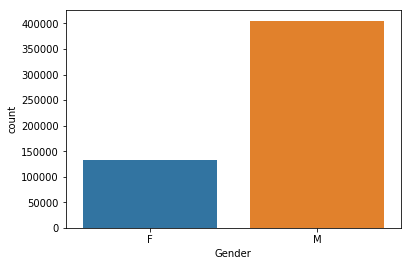

In [12]:
#Count Plot for Gender
sns.countplot(bf_data['Gender'])

Above graph shows <b>less number of females participated in sale</b>, which is unlikely, but as it is coming from data we can assume thats because their male counterparts (Father/ Husband/ Boyfriend/ Brother) paid for the purchases.

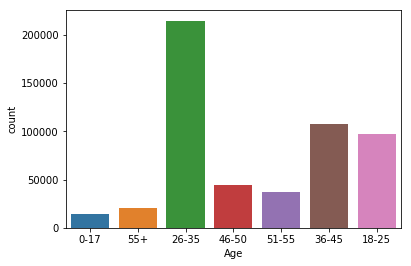

In [13]:
#Count Plot for Age
sns.countplot(bf_data['Age'])

From above visualization it is very clear that the <b>majority of buyers in the sale were from the age group 26-35years</b>.

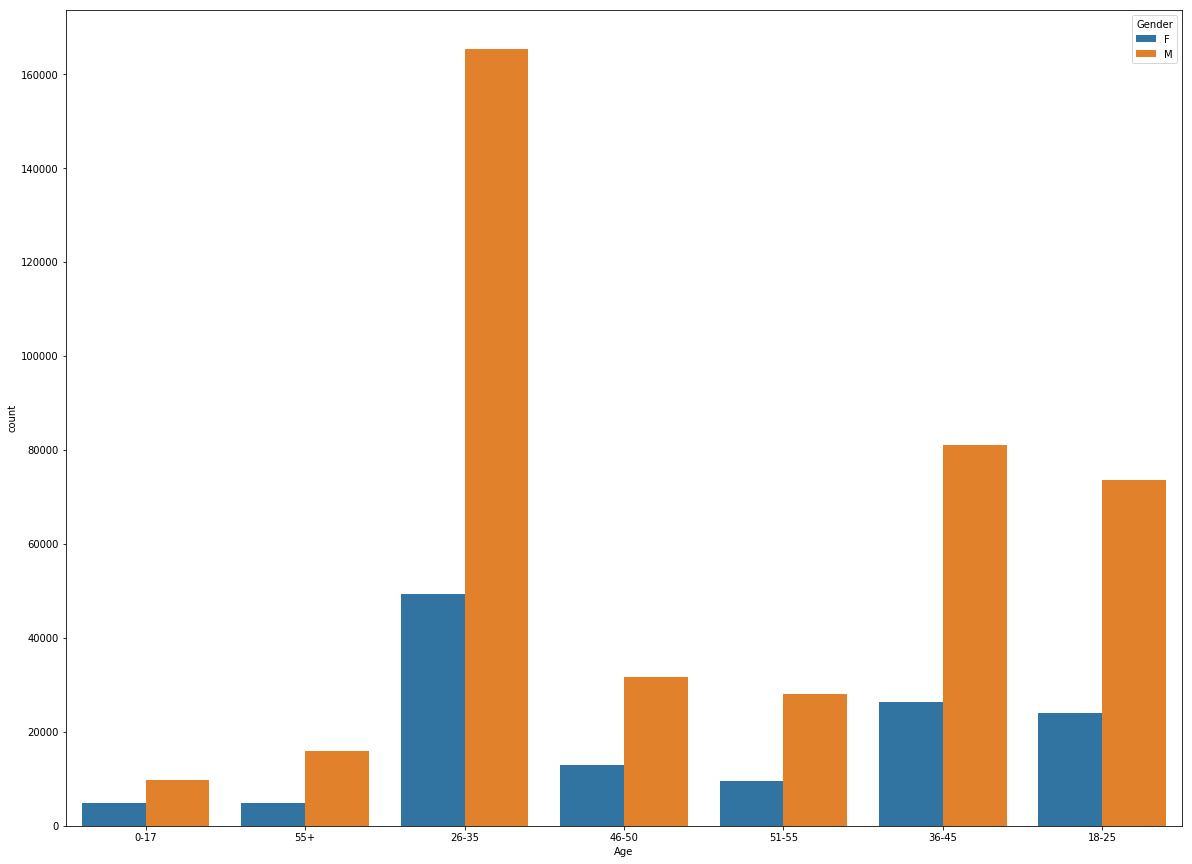

In [43]:
#Count Plot for Age and Gender

plt.figure(figsize=(20,15))
sns.countplot(bf_data['Age'], hue=bf_data['Gender'])

Above graph shows less number of females participated in sale under each age-group, which is unlikely, as we stated earlier this is because their male counterparts (Father/ Husband/ Boyfriend/ Brother) paid for the purchases.

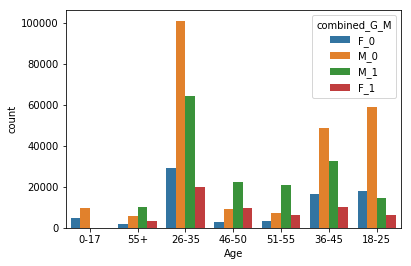

In [28]:
# check further - how many of these males were actually married? 
# For this lets create a column that represents gender+married status and then use it as hue.

bf_data['combined_G_M'] = bf_data.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
sns.countplot(bf_data['Age'],hue=bf_data['combined_G_M'])

From above graph it is clear that there were no married male or female in the age group 0-17, which makes sense too. Also we can identify that majority of purchases were made by the males in age group 26-35 followed by age group 18-25 & 36-45

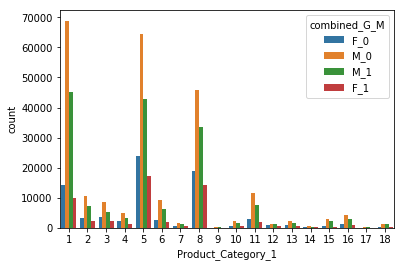

In [30]:
#Now lets find who brought what from Product Category 1
sns.countplot(bf_data['Product_Category_1'],hue=bf_data['combined_G_M'])

Its clear that 1,5, & 8 are the most selling items from Product Category1 and majority of purchases were done by males 

In [ ]:
# check further - Which Product Category/ Sub Category is most selling during the sale period
# For this lets create a column that represents Product Category 1 + Product Category 2 + Product Category 3 and then use it as hue.

bf_data['combined_PC1_PC2_PC3'] = bf_data.apply(lambda x:'%s_%s_%s' % (x['Product_Category_1'],x['Product_Category_2'],x['Product_Category_3']),axis=1)
#bf_data['combined_PC1_PC2_PC3'] = bf_data.apply(lambda x:'%s_%s' % (x['Product_Category_1'],x['Product_Category_2']),axis=1)

#print(bf_data['combined_PC1_PC2_PC3'].unique())

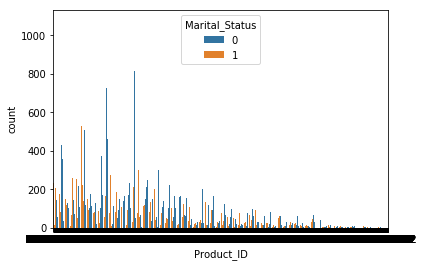

In [40]:
sns.countplot(bf_data['Product_ID'], hue=bf_data['Marital_Status'])

In [ ]:
#Count Plot for Product ID
plt.figure(figsize=(25,20))
plt.legend(fontsize=20)
plt.xlabel(fontsize=20)
plt.xlabel(fontsize=20)
sns.countplot(bf_data['Product_ID'])